In [1]:
import numpy as np

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

2023-12-02 10:47:11.673762: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-02 10:47:11.711222: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-02 10:47:11.711851: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-02 10:47:12.345396: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data = np.genfromtxt('../data/channel_N100_W1_100000.csv', delimiter=',')
data[0]

array([5.18244552, 4.22818906, 4.75204942, 3.95959992, 3.88797855,
       4.64470739, 4.63091312, 3.87574961, 4.66150023, 4.16544739,
       3.67742244, 3.84399705, 4.50363652, 4.09690769, 4.4105678 ,
       4.31244328, 4.01928335, 3.76855085, 4.00174436, 3.62397598,
       4.3970078 , 4.50442712, 4.21621095, 4.25969893, 4.26104095,
       4.39475146, 4.46909537, 4.14302019, 4.49397668, 4.39933113,
       4.28970598, 4.10073515, 4.30410862, 4.54039186, 4.58287653,
       4.19334846, 3.910294  , 3.66103921, 4.01974995, 4.93910885,
       3.76588749, 4.43765218, 4.37789092, 4.10562048, 5.18532083,
       4.15425597, 4.53572327, 4.09149069, 4.32426882, 4.48210204,
       3.9264358 , 4.34131847, 4.02206632, 4.53928103, 4.33403448,
       4.2109083 , 4.11059001, 4.42920268, 4.6260744 , 3.9315755 ,
       4.54204653, 4.13283995, 4.25395026, 4.15324113, 3.9847551 ,
       4.33276018, 3.98366874, 4.47122892, 4.69604187, 3.72590203,
       4.39286477, 3.84979007, 4.35644657, 4.12709905, 4.33887

In [3]:
N = 100         #Number of ports
N_init = 50     #Number of observed ports

classification = False

In [4]:
# # Creating input X
# x_data = []

# for i in range(len(data)):
#     arr = []
#     for j in range(0,N,int(N/N_init)):
#         arr.append(data[i][j])
#     x_data.append(arr)

# x_data = np.array(x_data)
# x_data[0]

In [5]:
def reduzir_array(arr, novo_tamanho):
    indices = np.linspace(0, len(arr) - 1, novo_tamanho, dtype=int)
    array_reduzido = arr[indices]
    return array_reduzido

x_data = []

for i in range(len(data)):
    arr = reduzir_array(data[i], N_init)
    x_data.append(arr)

x_data = np.array(x_data)
x_data[0]

array([5.18244552, 4.75204942, 3.88797855, 4.63091312, 4.66150023,
       3.67742244, 4.50363652, 4.4105678 , 4.01928335, 4.00174436,
       4.3970078 , 4.21621095, 4.26104095, 4.46909537, 4.49397668,
       4.28970598, 4.30410862, 4.58287653, 3.910294  , 4.01974995,
       3.76588749, 4.37789092, 5.18532083, 4.53572327, 4.32426882,
       3.9264358 , 4.02206632, 4.33403448, 4.11059001, 4.6260744 ,
       4.54204653, 4.25395026, 3.9847551 , 3.98366874, 4.69604187,
       4.39286477, 4.35644657, 4.33887363, 4.65244232, 3.45284446,
       4.08751155, 4.63840419, 4.47213396, 4.53304088, 3.82075209,
       4.78193689, 4.34177949, 4.4038625 , 4.65790432, 4.24670524])

In [6]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(-1, 1))

# # Supondo que X seja seu conjunto de dados
# x_data = scaler.fit_transform(x_data)
# data = scaler.fit_transform(data)

In [7]:
# Converting to 3D input, as requested in conv1D
sample_size = x_data.shape[0]
n_ports = x_data.shape[1] #N_init
input_dimension = 1

x_data_reshaped = x_data.reshape(sample_size, n_ports, input_dimension)

In [8]:
#Dados para Classificação

if classification:
    classification_data = data.copy()

    for i in range(len(classification_data)):
        pos = np.argmax(classification_data[i], axis=0)
        classification_data[i][:] = 0
        classification_data[i][pos] = 1

    classification_data[0]

In [9]:
# 70% Treino, 15% validação, 15% Teste

if classification:
    X_train, X_temp_test, y_train, y_temp_test = train_test_split(x_data_reshaped, classification_data, test_size=0.3)
    X_test, X_val, y_test, y_val = train_test_split(X_temp_test, y_temp_test, test_size=0.5)
else:
    X_train, X_temp_test, y_train, y_temp_test = train_test_split(x_data_reshaped, data, test_size=0.3)
    X_test, X_val, y_test, y_val = train_test_split(X_temp_test, y_temp_test, test_size=0.5)

In [10]:
#Normalize data

mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_val   = (X_val - mean) / std
X_test  = (X_test - mean) / std

if not classification:
    y_train = (y_train - mean) / std
    y_val   = (y_val - mean) / std
    y_test  = (y_test - mean) / std


In [11]:
X_train.max()

2.5215988146077186

In [12]:
input_shape = (N_init, 1)

model = models.Sequential()

model.add(layers.Conv1D(filters=50, kernel_size=5, activation='linear', input_shape=input_shape))
# model.add(layers.Dropout(0.2))
# model.add(layers.AveragePooling1D(pool_size=2))
model.add(layers.MaxPooling1D())

model.add(layers.Flatten())

model.add(layers.Dense(150, activation='linear'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(150, activation='linear'))


if classification:
    model.add(layers.Dense(N, activation='softmax')) #Classification
else:
    model.add(layers.Dense(N, activation='linear'))  #Regression

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 46, 50)            300       
                                                                 
 max_pooling1d (MaxPooling1  (None, 23, 50)            0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1150)              0         
                                                                 
 dense (Dense)               (None, 150)               172650    
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_1 (Dense)             (None, 150)               22650     
                                                        

2023-12-02 10:47:21.674841: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-02 10:47:21.675546: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [13]:
model.compile(optimizer='adam',
            #   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),

            #Regression losses
                loss='mse',
                # loss='msle',

            #Classification losses
                # loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                # loss='categorical_crossentropy',

            metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    epochs=100, 
                    validation_data=(X_val, y_val),
                    shuffle=True,
                    batch_size=10
                    )

Epoch 1/100


7000/7000 [==============================] - 14s 2ms/step - loss: 0.1532 - accuracy: 0.2046 - val_loss: 0.1260 - val_accuracy: 0.3281
Epoch 2/100
7000/7000 [==============================] - 14s 2ms/step - loss: 0.1399 - accuracy: 0.2457 - val_loss: 0.1238 - val_accuracy: 0.3263
Epoch 3/100
7000/7000 [==============================] - 14s 2ms/step - loss: 0.1385 - accuracy: 0.2482 - val_loss: 0.1255 - val_accuracy: 0.3237
Epoch 4/100
7000/7000 [==============================] - 13s 2ms/step - loss: 0.1384 - accuracy: 0.2492 - val_loss: 0.1228 - val_accuracy: 0.3187
Epoch 5/100
7000/7000 [==============================] - 14s 2ms/step - loss: 0.1381 - accuracy: 0.2478 - val_loss: 0.1245 - val_accuracy: 0.3321
Epoch 6/100
7000/7000 [==============================] - 13s 2ms/step - loss: 0.1378 - accuracy: 0.2467 - val_loss: 0.1215 - val_accuracy: 0.3375
Epoch 7/100
7000/7000 [==============================] - 13s 2ms/step - loss: 0.1376 - accuracy: 0.2510 - val_loss: 0.1224 - val_accurac

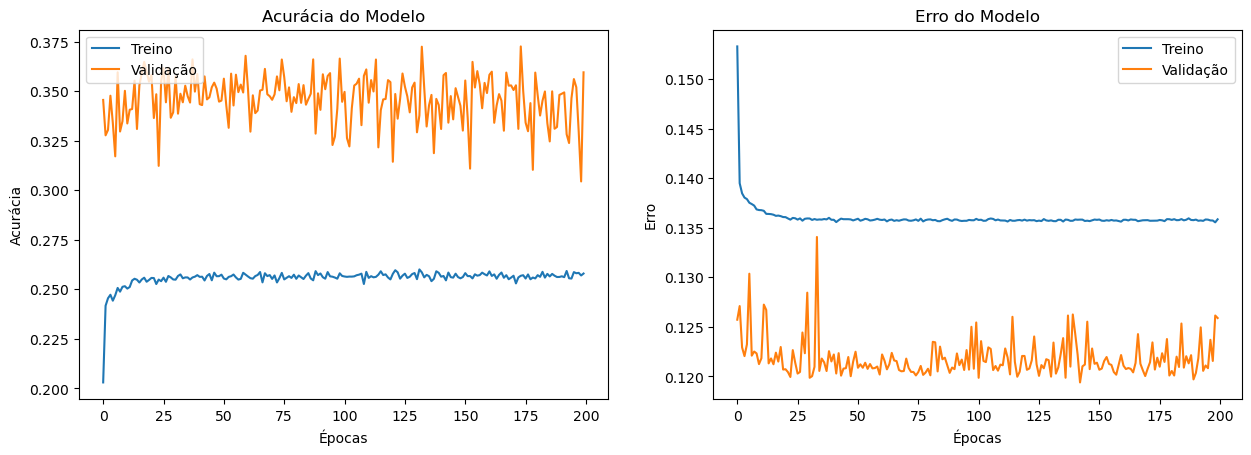

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(15)
#Acuracia do Modelo
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Acurácia do Modelo')
ax1.set_ylabel('Acurácia')
ax1.set_xlabel('Épocas')
ax1.legend(['Treino', 'Validação'], loc='upper left')


#Erro do Modelo
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Erro do Modelo')
ax2.set_ylabel('Erro')
ax2.set_xlabel('Épocas')
ax2.legend(['Treino', 'Validação'], loc='upper right')


In [ ]:
y_test[0]

array([ 0.89139212, -0.36003621,  0.3188805 ,  0.70727996,  0.46929735,
        0.60372657,  0.27430018,  0.32820196,  0.50926295,  0.22521539,
       -0.38712636,  0.90072363,  0.68451732,  0.92392308,  0.32029935,
        0.41459542,  0.95578424,  0.71369498,  0.61259193,  0.83167628,
        0.67820295,  0.73421864,  0.61018011,  0.59292595,  0.39596393,
        0.80597282,  0.37015641,  0.40062882,  0.35465526,  0.77528148,
        0.34010199,  0.8252106 ,  0.93652733,  0.61509485,  0.55532041,
        0.74929852,  0.89063945,  0.65970025,  0.52021517,  0.30387006,
        0.96136342, -0.11445985,  0.40929967,  0.83829118,  0.53683554,
        0.77761346, -0.00742955,  0.44840592,  0.17224661,  0.85527487,
        0.3383104 ,  0.4137815 ,  0.48563239,  0.84642583,  0.43640565,
        0.33026643,  0.83703469,  0.58479499,  0.62921394,  0.45945586,
        0.73438846,  0.36592796,  0.79950604,  0.75016475, -0.05234938,
        0.10277366,  0.6064376 ,  0.64596474,  0.70877727,  0.41

In [ ]:
p = X_test[0].reshape(1,N_init,1)

In [ ]:
p

array([[[ 0.89139212],
        [ 0.3188805 ],
        [ 0.46929735],
        [ 0.27430018],
        [ 0.50926295],
        [-0.38712636],
        [ 0.68451732],
        [ 0.32029935],
        [ 0.95578424],
        [ 0.61259193],
        [ 0.67820295],
        [ 0.61018011],
        [ 0.39596393],
        [ 0.37015641],
        [ 0.35465526],
        [ 0.34010199],
        [ 0.93652733],
        [ 0.55532041],
        [ 0.89063945],
        [ 0.52021517],
        [ 0.96136342],
        [ 0.40929967],
        [ 0.53683554],
        [-0.00742955],
        [ 0.17224661],
        [ 0.3383104 ],
        [ 0.48563239],
        [ 0.43640565],
        [ 0.83703469],
        [ 0.62921394],
        [ 0.73438846],
        [ 0.79950604],
        [-0.05234938],
        [ 0.6064376 ],
        [ 0.70877727],
        [ 0.58801516],
        [ 0.6514677 ],
        [ 0.49397434],
        [ 0.88718216],
        [ 0.96440433],
        [ 0.2433834 ],
        [ 0.84909285],
        [ 1.00302456],
        [ 0

In [ ]:
predict = model.predict(p)

1/1 [==============================] - 0s 65ms/step


In [ ]:
predict

array([[ 0.80365956,  0.519757  ,  0.52760875,  0.54776657,  0.46269968,
         0.53074706,  0.45885712,  0.5913533 ,  0.4837556 ,  0.5135489 ,
        -0.18529011,  0.52500623,  0.5512117 ,  0.51066077,  0.4570069 ,
         0.53185284,  0.8329892 ,  0.47227642,  0.6935452 ,  0.51172596,
         0.59569895,  0.5051037 ,  0.6564011 ,  0.5581045 ,  0.38626137,
         0.51625144,  0.411768  ,  0.5411684 ,  0.31166425,  0.47874942,
         0.41737148,  0.5303159 ,  0.846033  ,  0.51558995,  0.6249707 ,
         0.5378542 ,  0.8348812 ,  0.5281884 ,  0.5602547 ,  0.51191413,
         0.94490445,  0.5198163 ,  0.50411874,  0.53437555,  0.547755  ,
         0.5224597 ,  0.11704469,  0.52005076,  0.25093135,  0.5652691 ,
         0.37230253,  0.5657712 ,  0.47683918,  0.53512454,  0.5093473 ,
         0.5277397 ,  0.7907444 ,  0.5684258 ,  0.6084589 ,  0.5054039 ,
         0.6865532 ,  0.5521344 ,  0.8097589 ,  0.52562404,  0.04637045,
         0.5435366 ,  0.60894775,  0.5435487 ,  0.6

In [ ]:
y_test[0]

array([ 0.89139212, -0.36003621,  0.3188805 ,  0.70727996,  0.46929735,
        0.60372657,  0.27430018,  0.32820196,  0.50926295,  0.22521539,
       -0.38712636,  0.90072363,  0.68451732,  0.92392308,  0.32029935,
        0.41459542,  0.95578424,  0.71369498,  0.61259193,  0.83167628,
        0.67820295,  0.73421864,  0.61018011,  0.59292595,  0.39596393,
        0.80597282,  0.37015641,  0.40062882,  0.35465526,  0.77528148,
        0.34010199,  0.8252106 ,  0.93652733,  0.61509485,  0.55532041,
        0.74929852,  0.89063945,  0.65970025,  0.52021517,  0.30387006,
        0.96136342, -0.11445985,  0.40929967,  0.83829118,  0.53683554,
        0.77761346, -0.00742955,  0.44840592,  0.17224661,  0.85527487,
        0.3383104 ,  0.4137815 ,  0.48563239,  0.84642583,  0.43640565,
        0.33026643,  0.83703469,  0.58479499,  0.62921394,  0.45945586,
        0.73438846,  0.36592796,  0.79950604,  0.75016475, -0.05234938,
        0.10277366,  0.6064376 ,  0.64596474,  0.70877727,  0.41

1/1 [==============================] - 0s 13ms/step


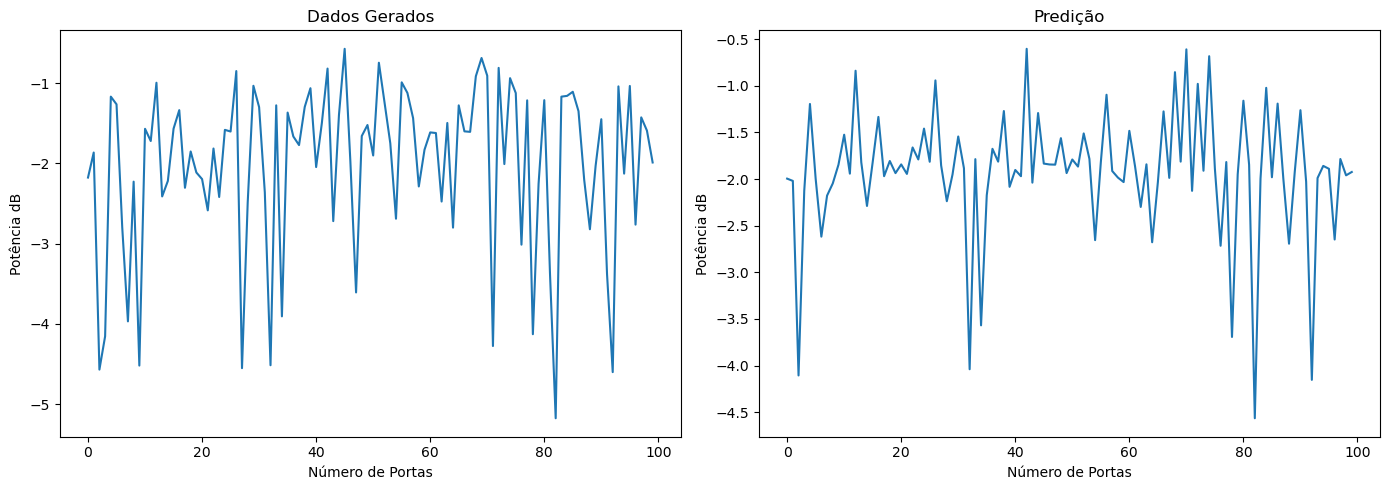

In [ ]:
POS = 1

p = X_test[POS].reshape(1,N_init,1)
predict = model.predict(p)

x = list(range(100))

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1
axs[0].plot(x, y_test[POS], '-o')
axs[0].set_title('Dados Gerados')
axs[0].set_xlabel('Número de Portas')
axs[0].set_ylabel('Potência dB')

# Gráfico 2
axs[1].plot(x, predict[0]'-o')
axs[1].set_title('Predição')
axs[1].set_xlabel('Número de Portas')
axs[1].set_ylabel('Potência dB')

# Ajustando o layout
plt.tight_layout()

# Exibindo os gráficos
plt.show()

In [ ]:
np.argmax(y_test[POS], axis=0)

45

In [ ]:
np.argmax(predict[0], axis=0)

42

In [ ]:
acertos = 0
acertos_min = 0

for i in range(len(y_test)):
    p = X_test[i].reshape(1,N_init,1)
    predict = model.predict(p)

    port_test = np.argmax(y_test[i], axis=0)
    port_predict = np.argmax(predict[0], axis=0)

    port_test_min = np.argmin(y_test[i], axis=0)
    port_predict_min = np.argmin(predict[0], axis=0)

    if port_test == port_predict:
        acertos += 1

    if port_test_min == port_predict_min:
        acertos_min += 1

accuracy = acertos/len(y_test)
accuracy_min = acertos_min/len(y_test)

print(f'A acurácia da máxima porta foi:'+str(accuracy*100)+'%')
print(f'A acurácia da mínima porta foi:'+str(accuracy_min*100)+'%')




1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step
A acurácia da máxima porta foi:35.71333333333334%
A acurácia da mínima porta foi:43.96%
